In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Print dataset info
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns and types:\n{df.dtypes}")

# Example application: Predicting air quality based on environmental factors


Number of rows: 9357
Number of columns: 15
Columns and types:
Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


Mean: -34.21
Median: 1.50
Standard Deviation: 77.66
Variance: 6030.64
Min: -200.00
Max: 11.90


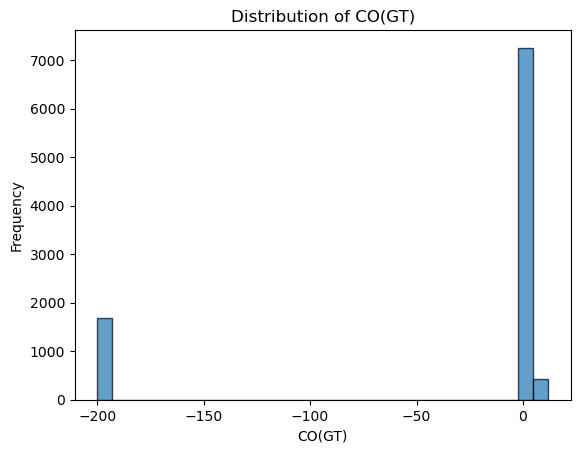

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select the attribute
attribute = 'CO(GT)'

# Compute measures
mean_value = df[attribute].mean()
median_value = df[attribute].median()
std_dev = df[attribute].std()
variance = df[attribute].var()
min_value = df[attribute].min()
max_value = df[attribute].max()

# Print results
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Min: {min_value:.2f}")
print(f"Max: {max_value:.2f}")

# Visualization
plt.hist(df[attribute].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {attribute}')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.show()


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select the attribute
attribute = 'CO(GT)'

# Replace missing values and normalize
df[attribute] = df[attribute].replace(-200, float('nan'))
df = df.dropna(subset=[attribute])

# Min-Max Normalization
scaler = MinMaxScaler()
df[attribute] = scaler.fit_transform(df[[attribute]])

# Print normalized data
print(df.head())


        Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00  0.211864      1360.00       150  11.881723   
1 2004-03-10  19:00:00  0.161017      1292.25       112   9.397165   
2 2004-03-10  20:00:00  0.177966      1402.00        88   8.997817   
3 2004-03-10  21:00:00  0.177966      1375.50        80   9.228796   
4 2004-03-10  22:00:00  0.127119      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90

In [4]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Sample 20 data objects
df_sample = df.sample(n=20)

# Compute pairwise similarity
data = df_sample[['CO(GT)']].values  # Adjust to include all relevant attributes
similarity_matrix = cosine_similarity(data)

# Find the pair with maximum similarity
np.fill_diagonal(similarity_matrix, 0)  # Ignore self-similarity
max_sim = np.max(similarity_matrix)
pair_indices = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)

print(f"Maximum similarity score: {max_sim}")
print(f"Pair with maximum similarity: {pair_indices}")

# Data for the most similar pair
print("Data for the most similar pair:")
print(df_sample.iloc[pair_indices[0]])
print(df_sample.iloc[pair_indices[1]])


Maximum similarity score: 1.0
Pair with maximum similarity: (0, 1)
Data for the most similar pair:
Date             2004-08-19 00:00:00
Time                        16:00:00
CO(GT)                           1.2
PT08.S1(CO)                  1021.75
NMHC(GT)                        -200
C6H6(GT)                    6.810175
PT08.S2(NMHC)                  848.5
NOx(GT)                         32.0
PT08.S3(NOx)                  812.75
NO2(GT)                         44.0
PT08.S4(NO2)                 1583.25
PT08.S5(O3)                   732.25
T                             39.875
RH                             23.75
AH                          1.712745
Name: 3886, dtype: object
Date             2005-01-04 00:00:00
Time                        19:00:00
CO(GT)                           3.6
PT08.S1(CO)                   -200.0
NMHC(GT)                        -200
C6H6(GT)                      -200.0
PT08.S2(NMHC)                 -200.0
NOx(GT)                        486.8
PT08.S3(NOx)            

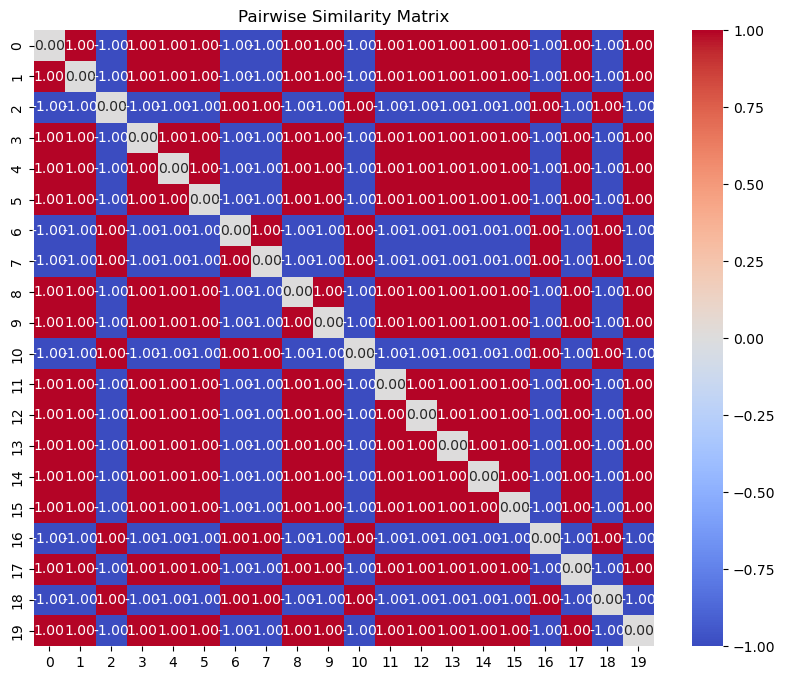

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Similarity Matrix')
plt.show()


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select numerical attributes for PCA
# Adjust the attribute names as needed
attributes = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)']  # Replace with your actual attribute names
df_selected = df[attributes].dropna()

# Normalize data
df_normalized = (df_selected - df_selected.mean()) / df_selected.std()

# Apply PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_normalized)

# Compute pairwise similarity
similarity_matrix_pca = cosine_similarity(pca_transformed)

# Find the pair with maximum similarity after PCA
np.fill_diagonal(similarity_matrix_pca, 0)  # Ignore self-similarity
max_sim_pca = np.max(similarity_matrix_pca)
pair_indices_pca = np.unravel_index(np.argmax(similarity_matrix_pca, axis=None), similarity_matrix_pca.shape)

print(f"Maximum similarity score after PCA: {max_sim_pca}")
print(f"Pair with maximum similarity after PCA: {pair_indices_pca}")

# Data for the most similar pair after PCA
print("Data for the most similar pair after PCA:")
print(df.iloc[pair_indices_pca[0]])
print(df.iloc[pair_indices_pca[1]])


Maximum similarity score after PCA: 1.0000000000000004
Pair with maximum similarity after PCA: (3521, 5223)
Data for the most similar pair after PCA:
Date             2004-08-04 00:00:00
Time                        11:00:00
CO(GT)                        -200.0
PT08.S1(CO)                   1093.5
NMHC(GT)                        -200
C6H6(GT)                    9.943305
PT08.S2(NMHC)                  975.5
NOx(GT)                       -200.0
PT08.S3(NOx)                  718.75
NO2(GT)                       -200.0
PT08.S4(NO2)                  1752.5
PT08.S5(O3)                   869.25
T                               35.6
RH                              30.6
AH                          1.749346
Name: 3521, dtype: object
Date             2004-10-14 00:00:00
Time                        09:00:00
CO(GT)                        -200.0
PT08.S1(CO)                  1024.25
NMHC(GT)                        -200
C6H6(GT)                    9.943305
PT08.S2(NMHC)                  975.5
NOx(GT)   